In [181]:
#Imported libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [182]:
#Data Collection

data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [183]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [184]:
#Data Analysis

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [185]:
data["output"].unique()

array([1, 0], dtype=int64)

1    165
0    138
Name: output, dtype: int64


<AxesSubplot:xlabel='output', ylabel='count'>

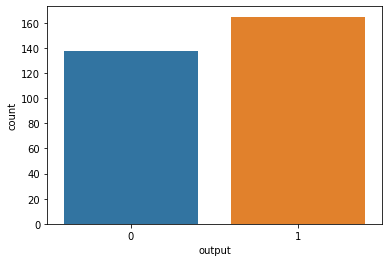

In [186]:
tar= data["output"]
target_dist= data.output.value_counts()
print(target_dist)
sns.countplot(tar)

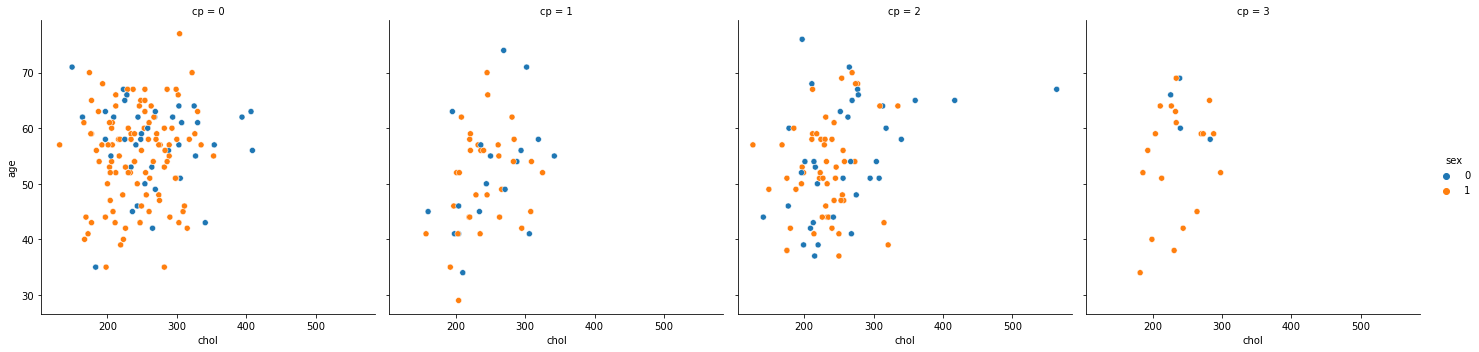

In [187]:
#Seaborn Relplot Chart

rela= sns.relplot(x= "chol", y="age", hue= "sex", data= data, col= "cp")

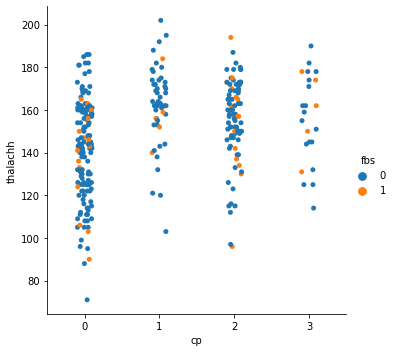

In [188]:
#Categorical Plots

cat= sns.catplot(x="cp", y= "thalachh", hue= "fbs", data= data)

In [189]:
#Data Preprocessing
#Checking for Missing Values

data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [190]:
#Checking for Duplicate Entries

dup_rows= data[data.duplicated()]
print("Number of duplicated entries are: ", dup_rows.shape)

Number of duplicated entries are:  (1, 14)


In [191]:
dup_rows.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [192]:
#Removing the Duplicate Rows

data.drop([164])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

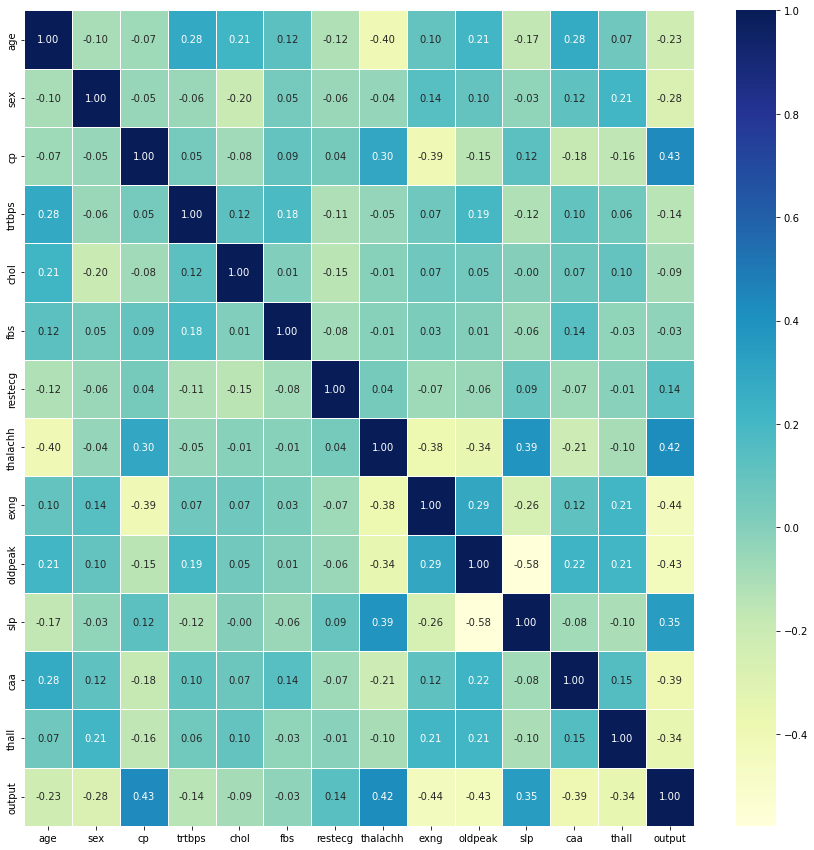

In [193]:
#Correlation Matrix 

corr_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

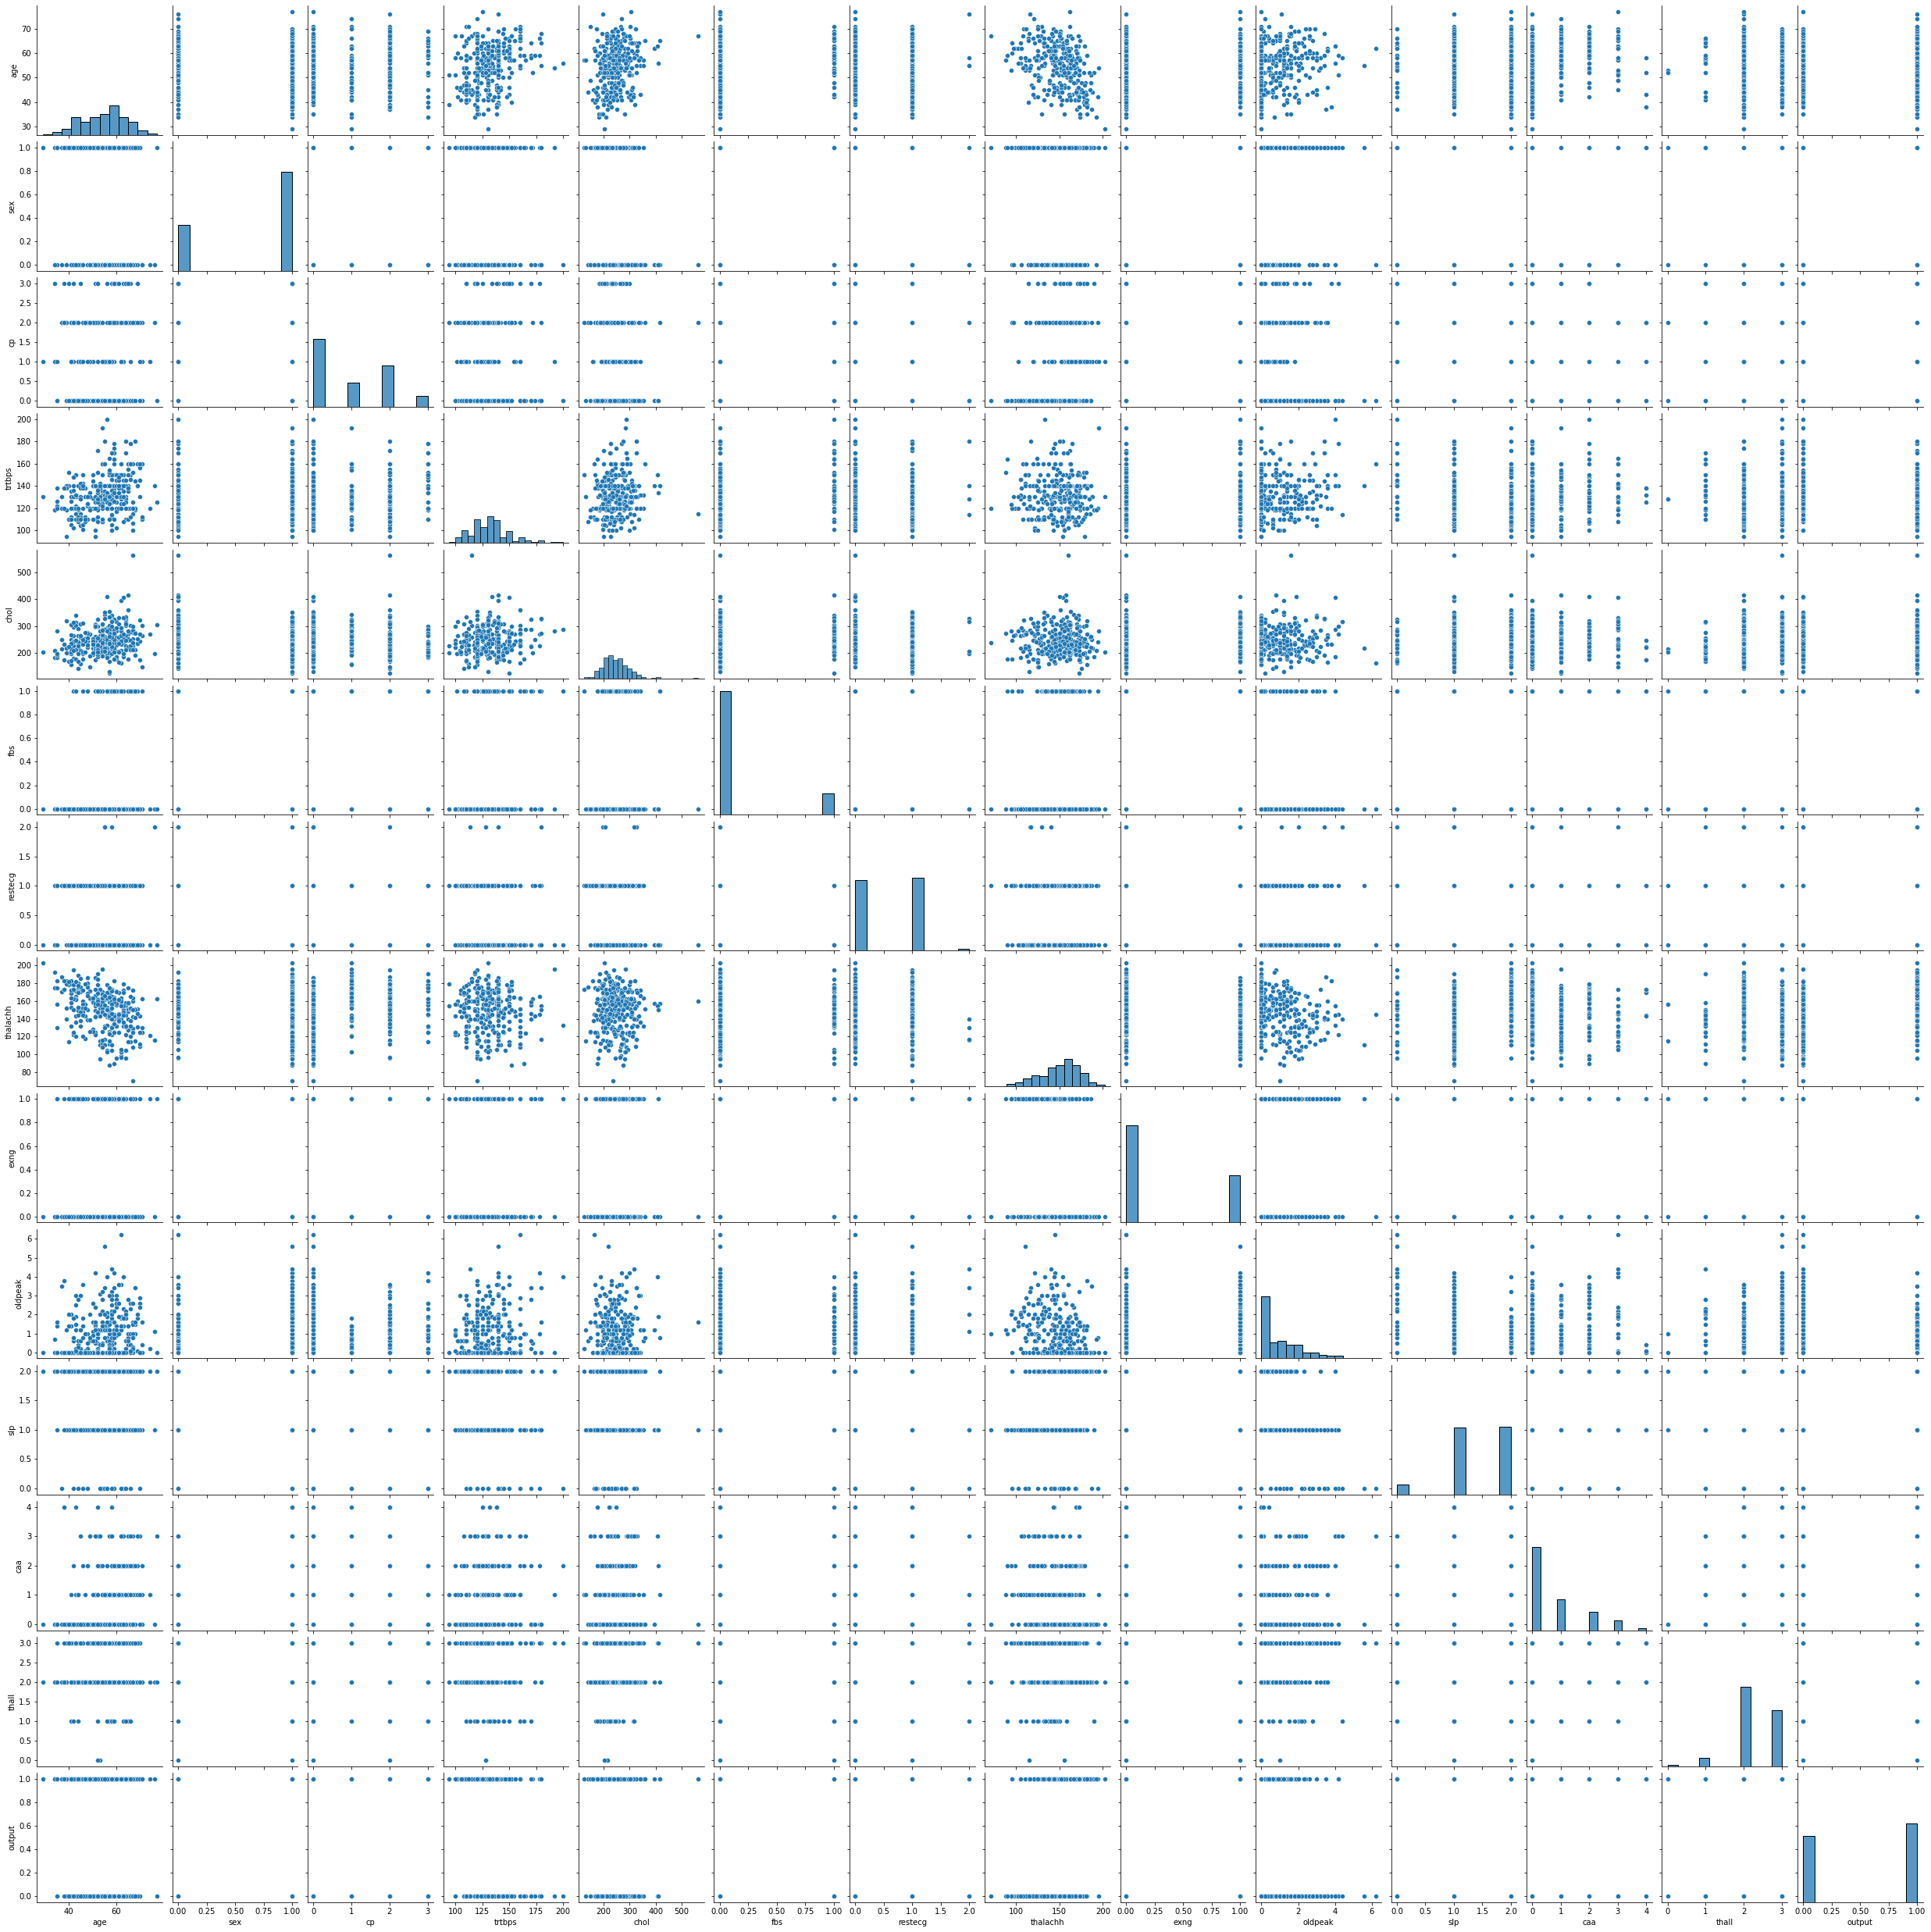

In [194]:
#Data Visualization
#Polar Plot

sns.pairplot(data=data)

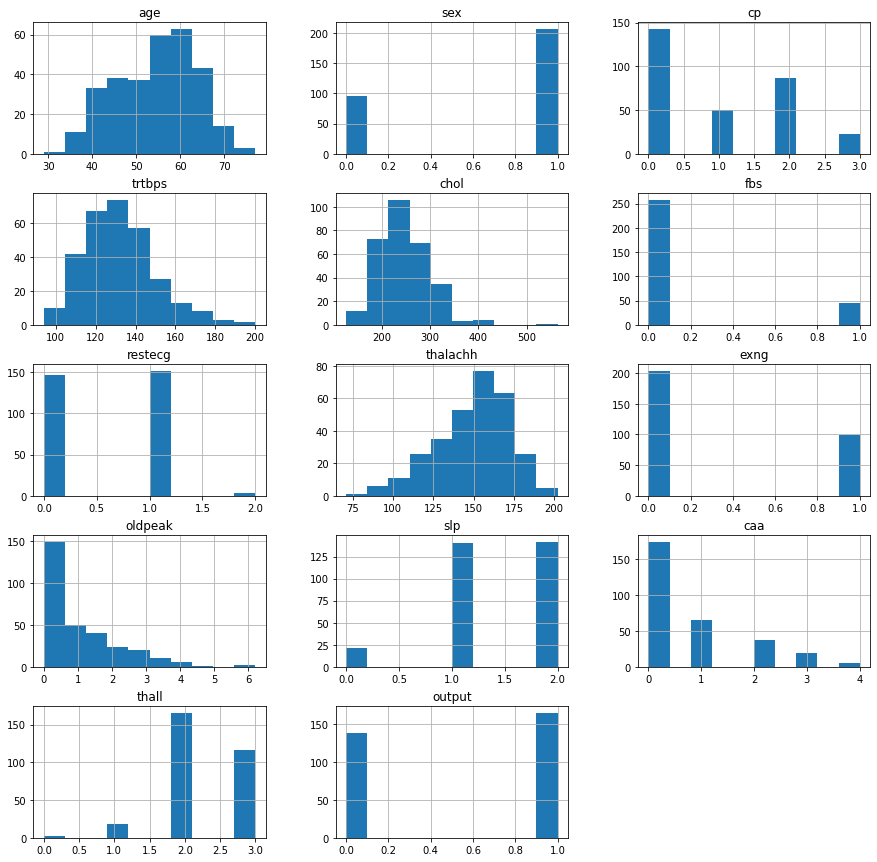

In [195]:
#Histogram

data.hist(figsize=(15,15), layout=(5,3));

In [196]:
#Spliting the Data

x = data.iloc[:, :-1]
y = data.iloc[:, -1]
print("Shape of X",x.shape)
print("Shape of y",y.shape)

Shape of X (303, 13)
Shape of y (303,)


In [197]:
#Splait the Data to Train and Test Data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
print("Shape of the data after making split:",X_train.shape)
print("Shape of the data after making split:",X_test.shape)

Shape of the data after making split: (272, 13)
Shape of the data after making split: (31, 13)


In [198]:
#Modelling
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 5)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [199]:
y_pred = dec_tree.predict(X_test)

In [200]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.8064516129032258


In [201]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.6833333333333333


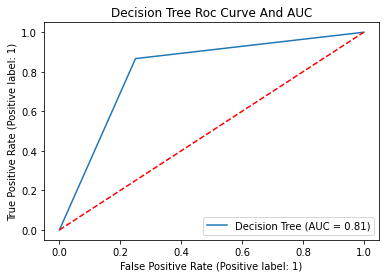

In [202]:
plot_roc_curve(dec_tree, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [203]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [204]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [205]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [206]:
y_pred = log_reg.predict(X_test)

In [207]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [208]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.9032258064516129


In [209]:
from sklearn.model_selection import cross_val_score

In [210]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7666666666666667


In [211]:
from sklearn.metrics import plot_roc_curve

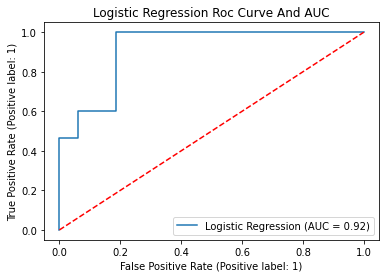

In [212]:
plot_roc_curve(log_reg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [213]:
#Support Vector Machine

from sklearn.svm import SVC

In [214]:
svc_model = SVC(random_state = 5)

In [215]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [216]:
y_pred = svc_model.predict(X_test)

In [217]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.6129032258064516


In [218]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.4166666666666667


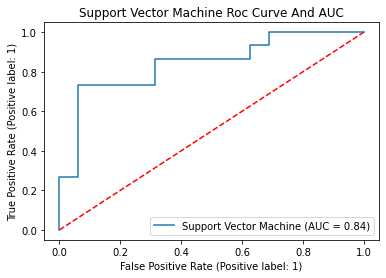

In [219]:
plot_roc_curve(svc_model, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [220]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [221]:
random_forest = RandomForestClassifier(random_state = 5)

In [222]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [223]:
y_pred = random_forest.predict(X_test)

In [224]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8064516129032258


In [225]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8416666666666666


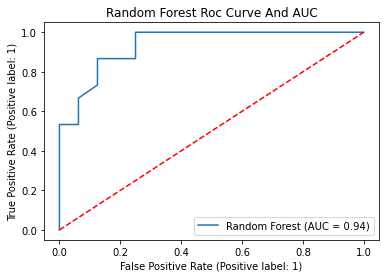

In [226]:
plot_roc_curve(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()